In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import matplotlib.lines as mlines
import math

Importing ilbraries

In [2]:
%autosave 2

Autosaving every 2 seconds


In [3]:
%matplotlib inline

For beautiful plots

In [4]:
df = pd.read_csv("ex2data1.txt", header=None)
df

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [5]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Importing data and important statistics regarding data

In [6]:
data = df.values

Converting df to data with only values so slicing can be made possible

In [7]:
X = data[:, :-1]
y = data[:, -1].reshape(len(data), 1)

Splitting into independent variables and dependent variables ( X and y respectively)

**Plotting data**
Method 1:
In this method, we use diffrent colors to indicate positive and negative examples. For that, we make an array which will store the color of respective example in the data.

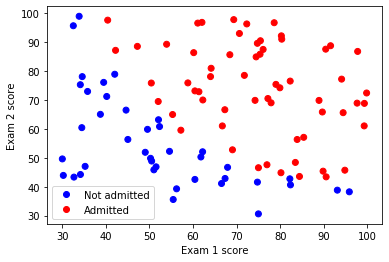

Plotted graph in 0.195153


In [8]:
start_time = time.time()
colors = ['red' if i == 1 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], color=colors)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
blue = mlines.Line2D([], [], color='blue', marker='o', label='Not admitted', linestyle='None')
red = mlines.Line2D([], [], color='red', marker='o', label='Admitted', linestyle='None')
plt.legend(loc=0, handles=[blue, red])
plt.show()
print("Plotted graph in {}".format(round(time.time() - start_time, 6)))

Method 2 (Method from tutorial of Andrew's course in python): In this method, we indicate pos and neg with both diffrent markers and diffrent colors. For doing so, we first seperate examples having 1 and 0. Then we plot them in the same scatter plot.  

Plotted graph in 0.019104


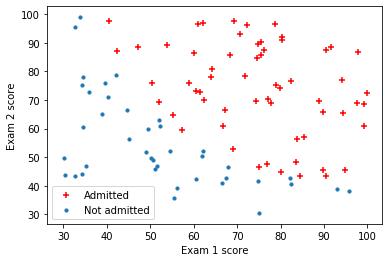

In [9]:
start_time = time.time()
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)
print("Plotted graph in {}".format(round(time.time() - start_time, 6)))

Method 3(Own method): Now, the simplest of method. for each example, we plot a scatter graph, and then display the cummulative scatter plot at the end of the for loop.

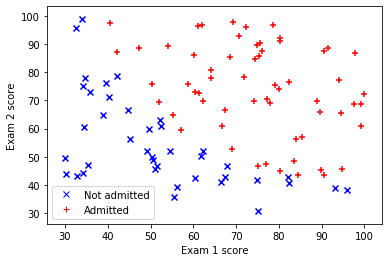

Plotted graph in 0.435281


In [10]:
start_time = time.time()
for i in range(len(data)):
    if y[i, 0] == 1:
        cur_marker = '+'
        cur_color = 'red'
    else:
        cur_marker = 'x'
        cur_color = 'blue'
    plt.scatter(X[i, 0], X[i, 1], marker=cur_marker, color=cur_color)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
blue = mlines.Line2D([], [], color='blue', marker='x', label='Not admitted', linestyle='None')
red = mlines.Line2D([], [], color='red', marker='+', label='Admitted', linestyle='None')
plt.legend(loc=0, handles=[blue, red])
plt.show()
print("Plotted graph in {}".format(round(time.time() - start_time, 6)))

As seen above, we have plotted the graph and obtained various statistics regarding the data. Now we will start building the Logistic Regression model for classification. 

Now, we will first use the sklearn model to have the easiest way of classifying the data. 

In [11]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X, y.flatten())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
regressor.coef_, regressor.intercept_

(array([[0.20535491, 0.2005838 ]]), array([-25.05219314]))

In [13]:
y_pred_sk = regressor.predict(X)

In [14]:
y_pred_sk
from sklearn.metrics import accuracy_score
score = accuracy_score(y, y_pred_sk)
score

0.89

As evident from the above cell, our sklearn model as given an accuracy of 89%.
Now, we will start building our own model using techniques learned from the course. 

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

sigmoid(0)

0.5

In [16]:
def costFunction(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = sum(error)/m
    grad = (np.dot(X.transpose(), (predictions - y)))/m
    return cost, grad

In [17]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [18]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [19]:
m, n = X.shape[0], X.shape[1]
X, mean, std = featureNormalization(X)
X = np.append(np.ones((m, 1)), X, axis=1)
y = y.reshape(m, 1)
ini_theta = np.zeros((n+1, 1))

In [20]:
cost, grad = costFunction(ini_theta, X, y)
cost, grad

(array([0.69314718]),
 array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [21]:
ini_theta, grad

(array([[0.],
        [0.],
        [0.]]),
 array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [22]:
theta, hist = gradientDescent(X, y, ini_theta, alpha=1, num_iters=400)

In [23]:
theta

array([[1.65947664],
       [3.8670477 ],
       [3.60347302]])

In [24]:
cost = costFunction(theta, X, y)
cost

(array([0.20359919]),
 array([[-0.0003566 ],
        [-0.00075919],
        [-0.0007345 ]]))

In [25]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0.5
p=classifierPredict(theta,X)
p = [int(i) for i in p]
p
score = accuracy_score(y, p)
#print("Train Accuracy:", sum(p==y)[0],"%")

In [26]:
score

0.88

As we can see, the model we built, gave an accuracy of about 88% which is 1% less than the sklearn model. Until now, we used gradient descent algorithm to optimize the function, but now we will try to use scipy's function to optimize it. For that, we will first create an extra copy so not to mess with any original data. 

In [27]:
import scipy.optimize as opt
X_test = data[:, :-1]
y_test = data[:, -1].reshape(len(data), 1)
ini_theta_test = np.zeros((n+1, 1))
X_test, y_test, ini_theta_test
X_test = np.hstack((np.ones((m, 1)), X_test))
y_ori = y
y = y[:, np.newaxis]

def testcostFunctiongrad(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = sum(error)/m
    grad = (np.dot(X.transpose(), (predictions - y)))/m
    return cost[0], grad

In [28]:
def testgrad(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = sum(error)/m
    grad = (np.dot(X.transpose(), (predictions - y)))/m
    return grad

In [29]:
def testcostFunction(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = sum(error)/m
    grad = (np.dot(X.transpose(), (predictions - y)))/m
    return cost

def testCF(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

def testg(theta, X, y):
    return ((1/m) * (X.T @ (sigmoid(X @ theta) - y)))

tcostc, tgradc = testcostFunctiongrad(ini_theta_test, X_test, y_test)
tcost = testcostFunction(ini_theta_test, X_test, y_test)
tgrad = testgrad(ini_theta_test, X_test, y_test)
t1cost = testCF(ini_theta_test, X_test, y_test)
t1g = testg(ini_theta_test, X_test, y_test)
tcostc, tgradc, tcost, tgrad, t1cost, t1g, round(tcostc, 5) == round(t1cost, 5), tgradc == t1g

temp = opt.fmin_tnc(func = testCF, x0 = ini_theta_test.flatten(), fprime=testg, args=(X_test, y_test.flatten()))

temp[0]

In [30]:
result = opt.fmin_tnc(func = testcostFunction, x0 = ini_theta_test.flatten(), fprime=testgrad, args=(X_test, y_test.flatten()))

In [31]:
scipy_theta = result[0].reshape(3, 1)
scipy_theta

array([[-25.16131854],
       [  0.20623159],
       [  0.20147149]])

In [32]:
testcostFunction(scipy_theta, X_test, y_test)

array([0.2034977])

In [33]:
scipy_pred = classifierPredict(theta,X)
scipy_pred = [int(i) for i in scipy_pred]
scipy_score = accuracy_score(y_ori, scipy_pred)
scipy_score

0.88